In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"C:\\Contents\\Kaggle\\udacity-mlcharity-competition\\census.csv")

df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [19]:
catcols = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
df = pd.get_dummies(df, columns=catcols)
df.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


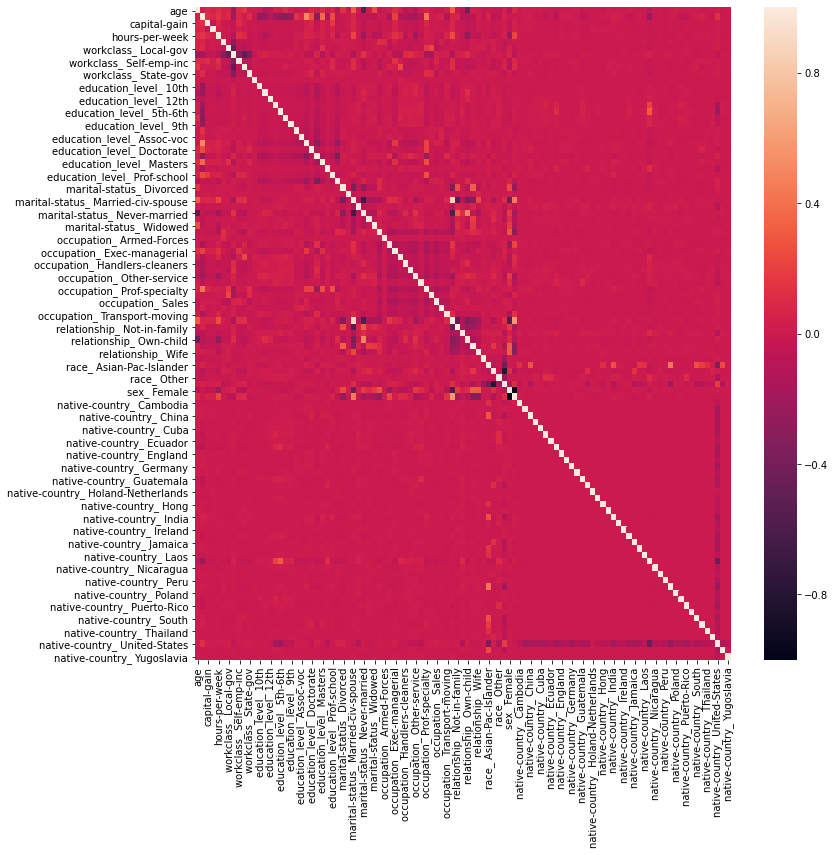

In [3]:
import seaborn as sb
fig = plt.figure(figsize=(12,12))
sb.heatmap(df.corr())
plt.show()

In [20]:
income_map = {'<=50K': 0, '>50K' : 1}
df['income'] = df['income'].map(income_map)

In [21]:
from sklearn.model_selection import train_test_split
feature_col_names = [col for col in df.columns if col not in set(["income"])]
predicted_class_names = ["income"]

X = df[feature_col_names].values

Y = df[predicted_class_names].values


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [22]:
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [23]:
X[0].shape

(103,)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(104, input_dim=103, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 104)               10816     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 105       
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=40,validation_data=(X_test,y_test))



Train on 31655 samples, validate on 13567 samples
Epoch 1/40
31655/31655 [==============================] - 4s 114us/step - loss: 0.2575 - accuracy: 0.8784 - val_loss: 0.3733 - val_accuracy: 0.8437
Epoch 2/40
31655/31655 [==============================] - 3s 92us/step - loss: 0.2538 - accuracy: 0.8803 - val_loss: 0.3774 - val_accuracy: 0.8468
Epoch 3/40
31655/31655 [==============================] - 3s 89us/step - loss: 0.2526 - accuracy: 0.8810 - val_loss: 0.3745 - val_accuracy: 0.8463
Epoch 4/40
31655/31655 [==============================] - 3s 87us/step - loss: 0.2513 - accuracy: 0.8807 - val_loss: 0.3768 - val_accuracy: 0.8463
Epoch 5/40
31655/31655 [==============================] - 3s 92us/step - loss: 0.2508 - accuracy: 0.8821 - val_loss: 0.3769 - val_accuracy: 0.8421
Epoch 6/40
31655/31655 [==============================] - 3s 92us/step - loss: 0.2497 - accuracy: 0.8808 - val_loss: 0.3829 - val_accuracy: 0.8451
Epoch 7/40
31655/31655 [==============================] - 3s 91us/s

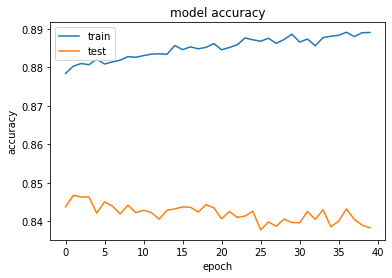

In [28]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


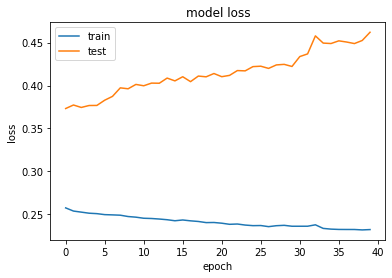

In [29]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [30]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(104, input_dim=103, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 104)               10816     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 105       
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=40,validation_data=(X_test,y_test))


Train on 31655 samples, validate on 13567 samples
Epoch 1/40
31655/31655 [==============================] - 5s 168us/step - loss: 0.3492 - accuracy: 0.8392 - val_loss: 0.3186 - val_accuracy: 0.8509
Epoch 2/40
31655/31655 [==============================] - 5s 145us/step - loss: 0.3222 - accuracy: 0.8489 - val_loss: 0.3236 - val_accuracy: 0.8499
Epoch 3/40
31655/31655 [==============================] - 4s 141us/step - loss: 0.3167 - accuracy: 0.8518 - val_loss: 0.3175 - val_accuracy: 0.8504
Epoch 4/40
31655/31655 [==============================] - 5s 145us/step - loss: 0.3132 - accuracy: 0.8539 - val_loss: 0.3157 - val_accuracy: 0.8550
Epoch 5/40
31655/31655 [==============================] - 5s 143us/step - loss: 0.3110 - accuracy: 0.8539 - val_loss: 0.3162 - val_accuracy: 0.8513
Epoch 6/40
31655/31655 [==============================] - 4s 141us/step - loss: 0.3085 - accuracy: 0.8560 - val_loss: 0.3162 - val_accuracy: 0.8536
Epoch 7/40
31655/31655 [==============================] - 5s 1

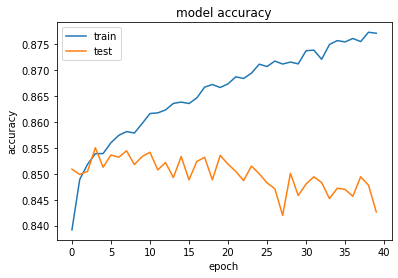

In [32]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


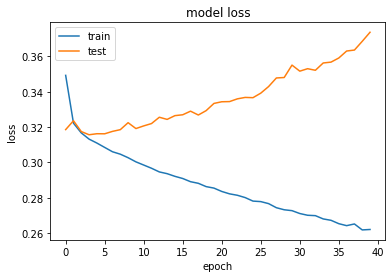

In [33]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [34]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=103, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=40,validation_data=(X_test,y_test))


Train on 31655 samples, validate on 13567 samples
Epoch 1/40
31655/31655 [==============================] - 5s 169us/step - loss: 0.3466 - accuracy: 0.8393 - val_loss: 0.3216 - val_accuracy: 0.8521
Epoch 2/40
31655/31655 [==============================] - 5s 146us/step - loss: 0.3219 - accuracy: 0.8496 - val_loss: 0.3179 - val_accuracy: 0.8518
Epoch 3/40
31655/31655 [==============================] - 5s 149us/step - loss: 0.3169 - accuracy: 0.8527 - val_loss: 0.3182 - val_accuracy: 0.8504
Epoch 4/40
31655/31655 [==============================] - 5s 143us/step - loss: 0.3129 - accuracy: 0.8535 - val_loss: 0.3156 - val_accuracy: 0.8522
Epoch 5/40
31655/31655 [==============================] - 5s 152us/step - loss: 0.3096 - accuracy: 0.8556 - val_loss: 0.3216 - val_accuracy: 0.8508
Epoch 6/40
31655/31655 [==============================] - 5s 149us/step - loss: 0.3073 - accuracy: 0.8567 - val_loss: 0.3186 - val_accuracy: 0.8537
Epoch 7/40
31655/31655 [==============================] - 5s 1

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=103, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=20, epochs=40,validation_data=(X_test,y_test))


Train on 31655 samples, validate on 13567 samples
Epoch 1/40
31655/31655 [==============================] - 2s 75us/step - loss: 0.3558 - accuracy: 0.8321 - val_loss: 0.3274 - val_accuracy: 0.8500
Epoch 2/40
31655/31655 [==============================] - 2s 67us/step - loss: 0.3330 - accuracy: 0.8432 - val_loss: 0.3233 - val_accuracy: 0.8489
Epoch 3/40
31655/31655 [==============================] - 2s 66us/step - loss: 0.3314 - accuracy: 0.8449 - val_loss: 0.3281 - val_accuracy: 0.8466
Epoch 4/40
31655/31655 [==============================] - 2s 67us/step - loss: 0.3302 - accuracy: 0.8448 - val_loss: 0.3246 - val_accuracy: 0.8493
Epoch 5/40
31655/31655 [==============================] - 2s 66us/step - loss: 0.3284 - accuracy: 0.8461 - val_loss: 0.3256 - val_accuracy: 0.8476
Epoch 6/40
31655/31655 [==============================] - 2s 65us/step - loss: 0.3270 - accuracy: 0.8453 - val_loss: 0.3209 - val_accuracy: 0.8511
Epoch 7/40
31655/31655 [==============================] - 2s 66us/st

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=103, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(32,  kernel_initializer='uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=40, epochs=30,validation_data=(X_test,y_test))


Train on 31655 samples, validate on 13567 samples
Epoch 1/30
31655/31655 [==============================] - 4s 113us/step - loss: 0.3921 - accuracy: 0.8247 - val_loss: 0.3541 - val_accuracy: 0.8418
Epoch 2/30
31655/31655 [==============================] - 3s 84us/step - loss: 0.3550 - accuracy: 0.8372 - val_loss: 0.3300 - val_accuracy: 0.8455
Epoch 3/30
31655/31655 [==============================] - 3s 80us/step - loss: 0.3344 - accuracy: 0.8434 - val_loss: 0.3252 - val_accuracy: 0.8502
Epoch 4/30
31655/31655 [==============================] - 3s 85us/step - loss: 0.3279 - accuracy: 0.8482 - val_loss: 0.3222 - val_accuracy: 0.8524
Epoch 5/30
31655/31655 [==============================] - 3s 85us/step - loss: 0.3231 - accuracy: 0.8497 - val_loss: 0.3212 - val_accuracy: 0.8489
Epoch 6/30
31655/31655 [==============================] - 3s 83us/step - loss: 0.3184 - accuracy: 0.8505 - val_loss: 0.3170 - val_accuracy: 0.8517
Epoch 7/30
31655/31655 [==============================] - 3s 85us/s

In [37]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(103, input_dim=103, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size=50, epochs=30,validation_data=(X_test,y_test))


Train on 31655 samples, validate on 13567 samples
Epoch 1/30
31655/31655 [==============================] - 3s 86us/step - loss: 0.3821 - accuracy: 0.8267 - val_loss: 0.3369 - val_accuracy: 0.8482
Epoch 2/30
31655/31655 [==============================] - 2s 62us/step - loss: 0.3388 - accuracy: 0.8424 - val_loss: 0.3329 - val_accuracy: 0.8446
Epoch 3/30
31655/31655 [==============================] - 2s 61us/step - loss: 0.3348 - accuracy: 0.8430 - val_loss: 0.3283 - val_accuracy: 0.8491
Epoch 4/30
31655/31655 [==============================] - 2s 59us/step - loss: 0.3326 - accuracy: 0.8447 - val_loss: 0.3246 - val_accuracy: 0.8497
Epoch 5/30
31655/31655 [==============================] - 2s 61us/step - loss: 0.3300 - accuracy: 0.8453 - val_loss: 0.3261 - val_accuracy: 0.8482
Epoch 6/30
31655/31655 [==============================] - 2s 62us/step - loss: 0.3270 - accuracy: 0.8465 - val_loss: 0.3238 - val_accuracy: 0.8484
Epoch 7/30
31655/31655 [==============================] - 2s 60us/st

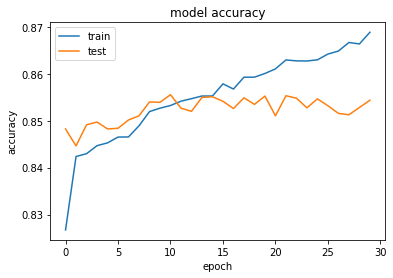

In [38]:
#Accuracy plot 
plt.plot(history.history[  'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


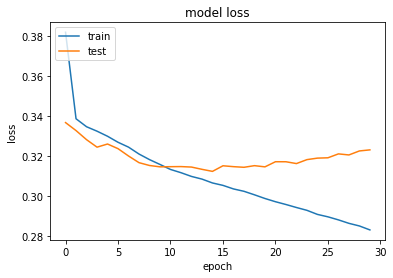

In [39]:
##Loss plot 
plt.plot(history.history[  'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
